In [2]:
# !pip install -r requirements.txt

In [3]:
# !pip install scikit-learn

In [4]:
# !pip install gym

In [1]:
import bernoulli_bandit as bb

### save datasets

In [2]:
p_values = [0.1,0.2,0.3,0.4,0.5]
datasets={}
for p in p_values:
    env = bb.BernoulliBanditEnv(bernoulli_prob=p)  # Create environment with the current p
    env = bb.BernoulliBanditWrapper(env)  # Wrap the environment if needed
    datasets[p] = bb.get_bandit_dataset(env, p=p, N_steps=100000)  # Generate the dataset and store it


bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.81984, std = 0.38432066611099647, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.67905, std = 0.46684161928859774, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.58219, std = 0.4931985440976079, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.51867, std = 0.4996513095149457, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.50046, std = 0.4999997883999552, max = 1.0, min = 0.0


## load datasets

In [3]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt

/home/niloufar/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/niloufar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
data_1 =pickle.load(open("bernoulli-bandit-p0.1.pkl", "rb"))


In [5]:

for p in p_values:
    file_name = f"bernoulli-bandit-p{p}.pkl"  
    datasets[p] = pickle.load(open(file_name, "rb"))  


In [6]:
for p, data in datasets.items():
    print(f"p={p}, type={type(data)}")  # Check the type of data

p=0.1, type=<class 'list'>
p=0.2, type=<class 'list'>
p=0.3, type=<class 'list'>
p=0.4, type=<class 'list'>
p=0.5, type=<class 'list'>


In [7]:
average_rewards =[]
for p, data in datasets.items():
  rewards = np.array([np.sum(entry["rewards"]) for entry in data])  
  average_reward = np.mean(rewards)  
  print(f"For p: {p}, average reward: {average_reward}")
  average_rewards.append(average_reward)

For p: 0.1, average reward: 0.81984
For p: 0.2, average reward: 0.67905
For p: 0.3, average reward: 0.58219
For p: 0.4, average reward: 0.51867
For p: 0.5, average reward: 0.50046


In [8]:
print(average_rewards)

[0.81984, 0.67905, 0.58219, 0.51867, 0.50046]


In [9]:


p_values=[]
expected_reward1=[]
expected_reward2=[]
best_reward=[]
start=0.1;
while start<0.6:
    p_values.append(start)
    num1=1-start
    num2=start
    expected_reward1.append(1-start)
    expected_reward2.append(start)
    if num1>num2:
        best_reward.append(num1)
    else:
        best_reward.append(num2)
    start = round(start + 0.1, 1)
    
print(p_values)
print(expected_reward1)
print(expected_reward2)
print(best_reward)

    
    

[0.1, 0.2, 0.3, 0.4, 0.5]
[0.9, 0.8, 0.7, 0.6, 0.5]
[0.1, 0.2, 0.3, 0.4, 0.5]
[0.9, 0.8, 0.7, 0.6, 0.5]


In [10]:
finaldata ={
 "p_values":p_values,
 "Expected Rewards a\u2081":expected_reward1,
 "Expected Rewards a\u2082" :expected_reward2,
  "Average Reward in Dataset" :average_rewards
}
df=pd.DataFrame(finaldata)
pd.set_option("display.width",None)
pd.set_option('display.max_columns', None)  


In [11]:
df

,p_values,Expected Rewards a₁,Expected Rewards a₂,Average Reward in Dataset
0,0.1,0.9,0.1,0.81984
1,0.2,0.8,0.2,0.67905
2,0.3,0.7,0.3,0.58219
3,0.4,0.6,0.4,0.51867
4,0.5,0.5,0.5,0.50046


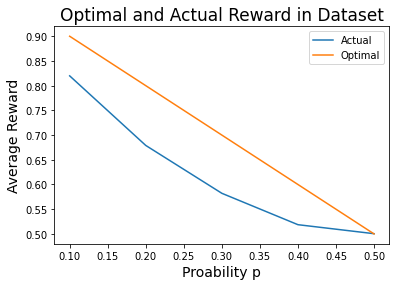

In [12]:
plt.plot(p_values,average_rewards,label="Actual")
plt.plot(p_values,best_reward,label="Optimal")
plt.title("Optimal and Actual Reward in Dataset",fontsize=17)
plt.xlabel("Proability p",fontsize=14)
plt.ylabel("Average Reward",fontsize=14)
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
p2data=datasets[0.2]
print(type(p2data))

<class 'list'>


In [15]:
train_data, temp_data = train_test_split(p2data, test_size=0.3, random_state=42)

In [16]:
print(type(train_data))
print(train_data[:5])

<class 'list'>
[{'observations': array([[0.]]), 'next_observations': array([[0.]]), 'actions': array([[0., 1.]]), 'rewards': array([0.]), 'terminals': array([ True])}, {'observations': array([[0.]]), 'next_observations': array([[0.]]), 'actions': array([[0., 1.]]), 'rewards': array([1.]), 'terminals': array([ True])}, {'observations': array([[0.]]), 'next_observations': array([[0.]]), 'actions': array([[1., 0.]]), 'rewards': array([0.]), 'terminals': array([ True])}, {'observations': array([[0.]]), 'next_observations': array([[0.]]), 'actions': array([[0., 1.]]), 'rewards': array([1.]), 'terminals': array([ True])}, {'observations': array([[0.]]), 'next_observations': array([[0.]]), 'actions': array([[0., 1.]]), 'rewards': array([1.]), 'terminals': array([ True])}]


In [17]:
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [18]:

rewards1 = [item['rewards'][0] for item in train_data]
rewards2 = [item['rewards'][0] for item in validation_data]
rewards3 = [item['rewards'][0] for item in test_data]
average_reward_training = np.mean(rewards1)
average_reward_validation = np.mean(rewards2)
average_reward_test = np.mean(rewards3)

print(average_reward_training,average_reward_validation,average_reward_test)
#saving data with numpy
rewards_training = np.array(rewards1)
rewards_validation = np.array(rewards2)
rewards_test=np.array(rewards3)
np.savetxt('rewards_training.csv', rewards_training, delimiter=',')
np.savetxt('rewards_validation.csv', rewards_validation, delimiter=',')
np.savetxt('rewards_test.csv', rewards_test, delimiter=',')

0.6807285714285715 0.6742666666666667 0.676


In [34]:
#1 save the data as is:
# pd.DataFrame(train_data).to_csv('train_data.csv',index=False)
# train_data = pd.read_csv('train_data.csv')
# train_states=[s[0][0] for s in train_data['observations']]
# train_actions=[a[0] for a in train_data['observations']]

#2 preprocess the data before saving:


train_states = [item['observations'][0][0] for item in train_data]
train_actions = [item['actions'][0] for item in train_data]
train_rewards = [item['rewards'][0] for item in train_data]
train_data=pd.DataFrame({'states':train_states,'actions':train_actions,'rewards':train_rewards})
train_data.to_csv('train_data.csv',index=False)